In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('../data/raw/Housing.csv')
df.head()


,rownames,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000,6360,2,1,1,yes,no,no,no,no,0,no


**Netoyage**
- rownames d'abord car c'est un index

In [ ]:
df = df.drop(columns=['rownames'])

- One-Hot Encoding, variables a transformer

In [39]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea'], dtype='object')

In [40]:
df_processed = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int)
df_processed.head(3)

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,42000,5850,3,1,2,1,1,0,1,0,0,0
1,38500,4000,2,1,1,0,1,0,0,0,0,0
2,49500,3060,3,1,1,0,1,0,0,0,0,0


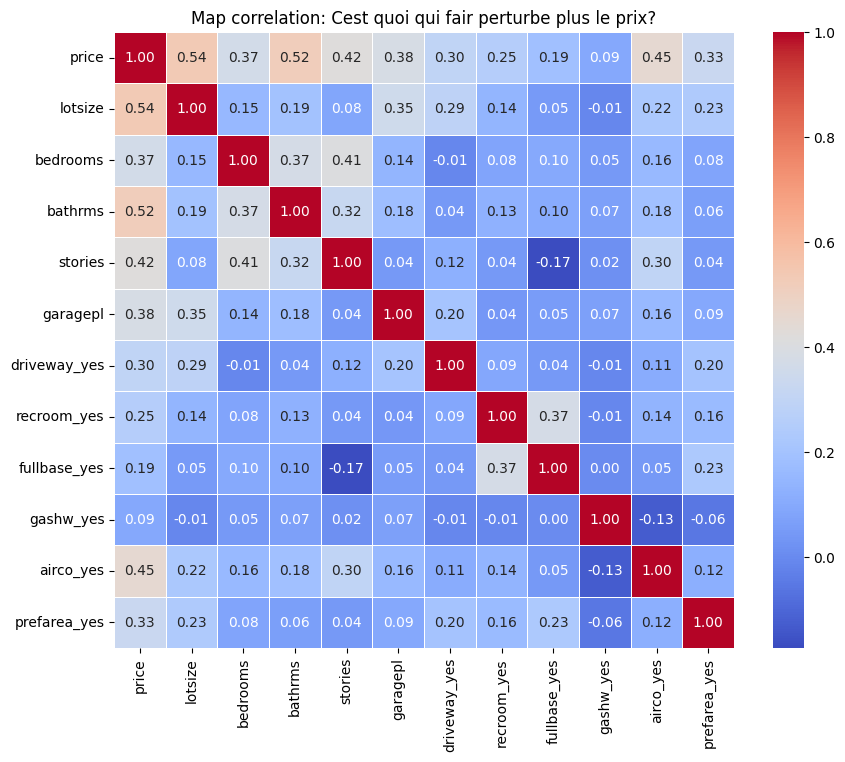

In [41]:
corr_matrix = df_processed.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Map correlation: Cest quoi qui fair perturbe plus le prix?')
plt.show()

In [42]:
df_processed.corr()

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
price,1.000000,0.535796,0.366447,0.516719,0.421190,0.383302,0.297167,0.254960,0.186218,0.092837,0.453347,0.329074
lotsize,0.535796,1.000000,0.151851,0.193833,0.083675,0.352872,0.288778,0.140327,0.047487,-0.009201,0.221765,0.234782
bedrooms,0.366447,0.151851,1.000000,0.373769,0.407974,0.139117,-0.011996,0.080492,0.097201,0.046028,0.160412,0.078953
bathrms,0.516719,0.193833,0.373769,1.000000,0.324066,0.178178,0.041955,0.126892,0.102791,0.067365,0.184955,0.064013
stories,0.421190,0.083675,0.407974,0.324066,1.000000,0.043412,0.122499,0.042281,-0.173860,0.018261,0.296216,0.042940
garagepl,0.383302,0.352872,0.139117,0.178178,0.043412,1.000000,0.203682,0.038122,0.052524,0.068144,0.156596,0.092364
driveway_yes,0.297167,0.288778,-0.011996,0.041955,0.122499,0.203682,1.000000,0.091959,0.043428,-0.011942,0.106290,0.199378
recroom_yes,0.254960,0.140327,0.080492,0.126892,0.042281,0.038122,0.091959,1.000000,0.372434,-0.010119,0.136626,0.161292
fullbase_yes,0.186218,0.047487,0.097201,0.102791,-0.173860,0.052524,0.043428,0.372434,1.000000,0.004677,0.045248,0.228651
gashw_yes,0.092837,-0.009201,0.046028,0.067365,0.018261,0.068144,-0.011942,-0.010119,0.004677,1.000000,-0.130350,-0.059170


In [43]:
print("\nTop 10 qui augmentent le prix:")
correlation = df_processed.corr()['price'].sort_values(ascending=False)
display(correlation.head(10))


Top 10 qui augmentent le prix:


price           1.000000
lotsize         0.535796
bathrms         0.516719
airco_yes       0.453347
stories         0.421190
garagepl        0.383302
bedrooms        0.366447
prefarea_yes    0.329074
driveway_yes    0.297167
recroom_yes     0.254960
Name: price, dtype: float64

**Enregistrer**

In [44]:
df_processed.to_csv('../data/processed/housing_clean.csv', index=False)
print("Enregistre comme: data/processed/housing_clean.csv")

Enregistre comme: data/processed/housing_clean.csv
